<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/AI/keras_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# CIFAR-10 데이터 다운로드 및 변수에 저장
(X_train, Y_train),(X_test,Y_test) = keras.datasets.cifar10.load_data()

# 데이터 전처리하기
X_train, X_test = X_train.astype('float32')/255.0 , X_test.astype('float32')/255.0

# 괄호가 있던 없던 데이터는 상관없음
# print(X_train.shape)
# print(Y_train.shape)
# RGB 3채널로 구성 (-1,32,32,3)

# 신경망 구성하기
# https://wikidocs.net/61374
# https://keras.io/ko/regularizers/
model = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    # keras.layers.Dropout(0.1), 과적합을 방지하기 위해 무작위로 특정 노드(입력값)를 0으로 만든다
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(16, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.1),
    keras.layers.Flatten(), # **2D 데이터를 1D 데이터로 변환
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])
# 모델 컴파일
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# 훈련하기 fit
# hist = model.fit(X_train, Y_train, batch_size = 8, epochs=5, validation_split=0.2, verbose = 1)
hist = model.fit(X_train, 
                 Y_train,
                 steps_per_epoch=250,
                 # batch_size = 1000,
                 epochs=200,
                 validation_split=0.2,
                 verbose=2)

Epoch 1/200
250/250 - 4s - loss: 1.9134 - accuracy: 0.2791 - val_loss: 1.7545 - val_accuracy: 0.3538 - 4s/epoch - 16ms/step
Epoch 2/200
250/250 - 2s - loss: 1.6492 - accuracy: 0.3828 - val_loss: 1.5631 - val_accuracy: 0.4255 - 2s/epoch - 9ms/step
Epoch 3/200
250/250 - 3s - loss: 1.5370 - accuracy: 0.4317 - val_loss: 1.5524 - val_accuracy: 0.4395 - 3s/epoch - 12ms/step
Epoch 4/200
250/250 - 2s - loss: 1.4755 - accuracy: 0.4557 - val_loss: 1.4287 - val_accuracy: 0.4816 - 2s/epoch - 9ms/step
Epoch 5/200
250/250 - 2s - loss: 1.4344 - accuracy: 0.4750 - val_loss: 1.3359 - val_accuracy: 0.5160 - 2s/epoch - 9ms/step
Epoch 6/200
250/250 - 2s - loss: 1.3994 - accuracy: 0.4906 - val_loss: 1.3081 - val_accuracy: 0.5297 - 2s/epoch - 9ms/step
Epoch 7/200
250/250 - 3s - loss: 1.3696 - accuracy: 0.5020 - val_loss: 1.2819 - val_accuracy: 0.5409 - 3s/epoch - 12ms/step
Epoch 8/200
250/250 - 2s - loss: 1.3550 - accuracy: 0.5046 - val_loss: 1.3646 - val_accuracy: 0.5103 - 2s/epoch - 9ms/step
Epoch 9/200
2

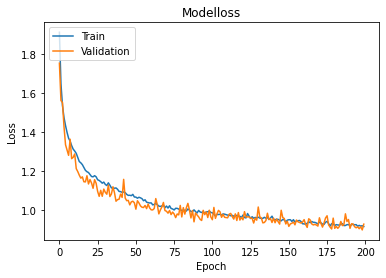

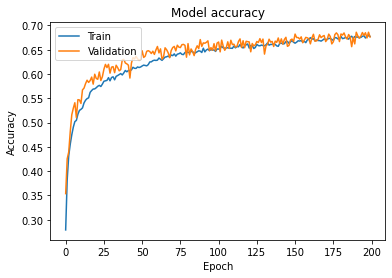

In [5]:
# 플롯

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Modelloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 - 1s - loss: 0.9309 - accuracy: 0.6752 - 758ms/epoch - 2ms/step
test loss: 0.9308843612670898
test accuracy: 0.6751999855041504
n: 1342
1/1 [==============================] - 0s 111ms/step
predict:  [7]
True_value : [7]


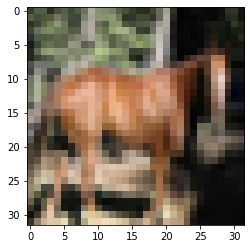

n: 8556
1/1 [==============================] - 0s 14ms/step
predict:  [7]
True_value : [4]


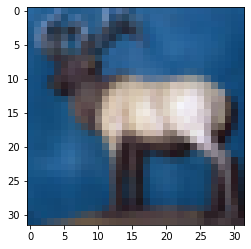

n: 9512
1/1 [==============================] - 0s 19ms/step
predict:  [0]
True_value : [0]


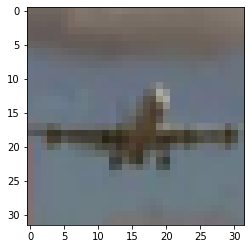

n: 4424
1/1 [==============================] - 0s 18ms/step
predict:  [1]
True_value : [1]


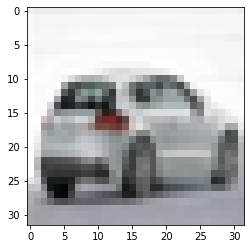

n: 3257
1/1 [==============================] - 0s 25ms/step
predict:  [7]
True_value : [7]


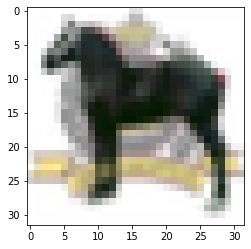

n: 4052
1/1 [==============================] - 0s 16ms/step
predict:  [5]
True_value : [5]


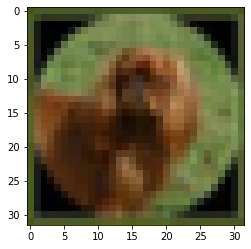

n: 914
1/1 [==============================] - 0s 18ms/step
predict:  [4]
True_value : [0]


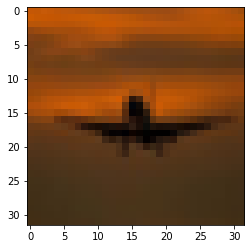

n: 7332
1/1 [==============================] - 0s 20ms/step
predict:  [7]
True_value : [7]


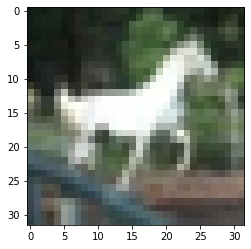

n: 7825
1/1 [==============================] - 0s 17ms/step
predict:  [6]
True_value : [3]


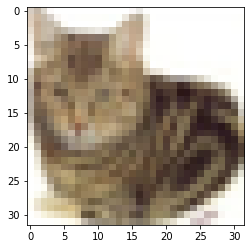

n: 2753
1/1 [==============================] - 0s 15ms/step
predict:  [7]
True_value : [7]


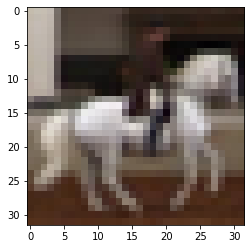

In [6]:
# 평가
loss, acc = model.evaluate(X_test,Y_test, verbose=2)
print("test loss:", loss)
print("test accuracy:", acc)

# prediction과 맞는지 비교

for i in range(10):
  n = int(np.random.rand()*10000)
  print("n:", n)
  print("predict: ", np.argmax(model.predict(X_test[n].reshape(1,32,32,3)),axis=1))
  print("True_value :", Y_test[n])

  plt.imshow(X_test[n].reshape(32,32,3), interpolation='nearest')
  plt.show()